# 다섯째 마당. 데이터 정제  - 빠진 데이터, 이상한 데이터 제거하기

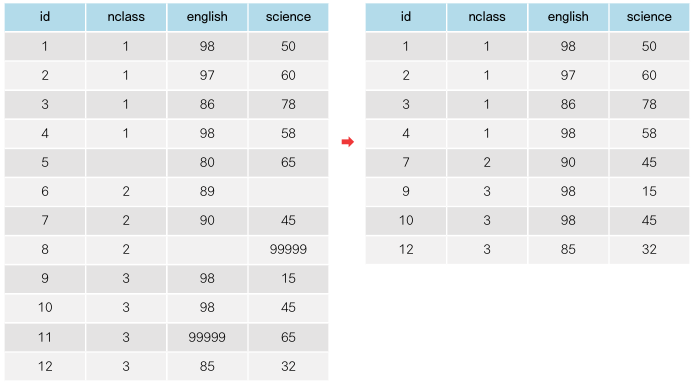

## 빠진 데이터를 찾아라! - 결측치 정제하기

### 결측치 찾기

**결측치(missing value)**: 누락된 값 또는 비어 있는 값

#### 결측치가 있는 가상 데이터 만들기

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

#### 결측치 확인하기

In [11]:
pd.isna(df)  # 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [12]:
pd.isna(df).sum()  # 결측치 빈도 확인

sex      1
score    1
dtype: int64

### 결측치 제거하기
#### 결측치 있는 행 제거하기

In [13]:
df.dropna(subset = ['score'])  # score 결측치 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [14]:
df_nomiss = df.dropna(subset = ['score'])  # score 결측치 제거된 데이터 만들기
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [15]:
df_nomiss['score'] + 1 

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

#### 여러 변수에 결측치 없는 데이터 추출하기

In [17]:
df_nomiss = df.dropna(subset = ['score', 'sex'])  # score, sex 결측치 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


#### 결측치가 하나라도 있으면 제거하기

In [18]:
df_nomiss2 = df.dropna()  # 모든 변수에 결측치 없는 데이터 추출
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


### 결측치 대체하기 (missing value imputation)
#### 평균값으로 결측치 대체하기

In [22]:
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/data-analytics-101/data/'

Mounted at /content/gdrive


In [25]:
exam = pd.read_csv(path + 'exam.csv')       # 데이터 불러오기
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [42]:
exam.loc[[2, 7, 14], ['math']] = np.nan     # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [43]:
exam['math'].isna().sum()  # 결측치 빈도 확인

3

```
df.loc[행 위치, 열 위치] # 행 위치와 열 위치를 지칭
```

In [38]:
exam['math'].mean()

55.23529411764706

In [39]:
exam['math'] = exam['math'].fillna(exam['math'].mean())  # 결측치를 평균값으로 대체
exam                            

,id,nclass,math,english,science
0,1,1,50.000000,98,50
1,2,1,60.000000,97,60
2,3,1,55.235294,86,78
3,4,1,30.000000,98,58
4,5,2,25.000000,80,65
5,6,2,50.000000,89,98
6,7,2,80.000000,90,45
7,8,2,55.235294,78,25
8,9,3,20.000000,98,15
9,10,3,50.000000,98,45


In [40]:
exam['math'].isna().sum()  # 결측치 빈도 확인

0

## 이상한 데이터를 찾아라 - 이상치 정제하기

**이상치(anomaly)**: 범위나 범주가 정의되어 있을 때 존재할 수 없는 값

In [50]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1, 2, 2, 1],    # 남자: 1, 여자: 2
                   'score' : [5, 4, 3, 4, 2, 6, 1, 3, 4]})   # 성적 범위: 1~5
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6
6,2,1
7,2,3
8,1,4


#### 이상치 확인하기

* 변수별 빈도 확인하기

In [51]:
df['sex'].value_counts(sort = False).sort_index()

1    4
2    4
3    1
Name: sex, dtype: int64

In [52]:
df['score'].value_counts(sort = False).sort_index()

1    1
2    1
3    2
4    3
5    1
6    1
Name: score, dtype: int64

#### 이상치를 결측치로 처리하기

In [53]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6
6,2.0,1
7,2.0,3
8,1.0,4


In [54]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN
6,2.0,1.0
7,2.0,3.0
8,1.0,4.0


In [55]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.dropna(subset = ['sex', 'score']) \
       .groupby('sex') \
       .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,2.5


#### [꿀팁] `np.where()`는 문자와 `NaN`을 함께 반환할 수 없음

In [77]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2, 3]})

In [78]:
df['x2'] = np.where(df['x1'] == 1, 'male', np.where(df['x1'] == 2, 'female', np.nan))
df

,x1,x2
0,1,male
1,1,male
2,2,female
3,2,female
4,3,nan


In [79]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [82]:
# 'nan'를 np.nan으로 대체
df['x2'] = np.where(df['x1'] == 1, 'male', np.where(df['x1'] == 2, 'female', np.nan))
df['x2'] = df['x2'].replace('nan', np.nan)
df

,x1,x2
0,1,male
1,1,male
2,2,female
3,2,female
4,3,NaN


In [85]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [83]:
# 결측치 지정을 위한 특정 문자열 부여하고 np.nan으로 대체
df['x2'] = np.where(df['x1'] == 1, 'male', np.where(df['x1'] == 2, 'female', 'etc'))
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,male
1,1,male
2,2,female
3,2,female
4,3,NaN


In [84]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


## 극단치 제거하기

**극단치(outlier)**: 논리적으로 존재할 수 있지만 극단적으로 크거나 작은 값

#### 상자 그림으로 극단치 기준 정하기

**상자 그림(box plot)**: 데이터의 분포를 직사각형의 상자 모양으로 표현한 그래프로 중심에서 멀리 떨어진 값을 점으로 표현

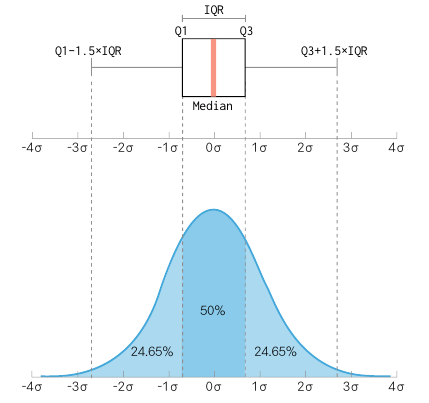

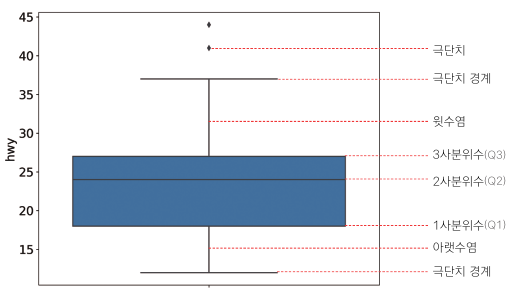

##### 1. 상자 그림 살펴보기

In [113]:
mpg = pd.read_csv(path + 'mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [114]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


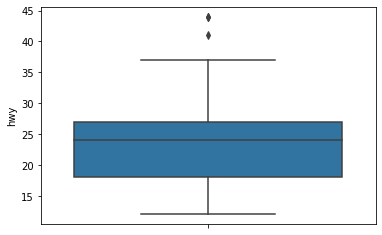

In [115]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [125]:
# drv별 분리
# hwy 평균 구하기
mpg.groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


##### 2.극단치 기준값 구하기

**(1) 1사분위수, 3사분위수 구하기**

In [126]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [127]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

**(2) IQR 구하기**

IQR(inter quartile range, 사분범위)

In [128]:
iqr = pct75 - pct25
iqr

9.0

**(3) 하한, 상한 구하기**

In [129]:
lower = pct25 - 1.5 * iqr  # 하한: 1사분위수보다 'IQR의 1.5배'만큼 더 작은 값

In [130]:
upper = pct75 + 1.5 * iqr  # 상한: 3사분위수보다 'IQR의 1.5배'만큼 더 큰 값

##### 3. 극단치를 결측 처리하기

In [131]:
# 극단치 경계를 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < lower) | (mpg['hwy'] > upper), np.nan, mpg['hwy'])

In [132]:
mpg['hwy'].isna().sum()

3

##### 4. 결측치 제거하고 분석하기

In [133]:
# hwy 결측치 제거
# drv별 분리
# hwy 평균 구하기
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


### 정리하기

In [ ]:
## 1. 결측치 정제하기
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거
df_nomiss = df.dropna()


## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])


## 3. 극단치 정제하기

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
lower = pct25 - 1.5 * iqr         # 하한
upper = pct75 + 1.5 * iqr         # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < lower) | (mpg['hwy'] > upper), np.nan, mpg['hwy'])